## Créditos

Autor: Santiago Ontañón Sánchez

El siguiente tutorial está basado en un tutorial de Steven Brandt que dio en el *2017 North American Einstien Toolkit School and Workshop at NCSA*. La versión original está disponible [aquí](https://github.com/stevenrbrandt/CactusTutorial).

# Cómo crear un Thorn para Cactus

## Estructura de un thorn

Crear un thorn dentro de Cactus no es muy complicado en el sentido de que no tenemos que preocuparnos de cómo funcionan los demás thorns y la parte flesh de Cactus. Sin embargo, si hay varios requisitos:

* Un thorn debe tener un nombre: **ThornName**
* Un thorn debe vivir en un *arangement*: **ArangementName**.
* Un thorn requiere cuatro archivos escritos en idioma CCL (Cactus Configuration Language). Estos deben residir en el directorio `arrangements/ArrangementName/ThornName/`.
     * `interface.ccl`
     * `schedule.ccl`
     * `param.ccl`
     * `configuration.ccl` (opcional).
* Un thorn requiere un directorio `src` para el código que le escribamos.
* Un thorn necesita un archivo `make.code.defn` con instrucciones para compilar.

Para mayor información y referencias, favor de consultar el [User's Guide de Cactus](http://einsteintoolkit.org/usersguide/UsersGuide.html). En particular la Parte C sobre *Thorn Writing*.

Primero importamos los comandos del sistema operativo y listamos la versión de Python por si resulta relevante.

In [1]:
import os

In [2]:
!python --version

Python 2.7.14 :: Intel Corporation


Continuaremos en el directior donde compilamos FunWave.

In [3]:
%cd ~/CactusTutorial/CactusFW2/

/home/santiago/CactusTutorial/CactusFW2


## Un thorn vacío

Vamos a implementar un thorn en Cactus llamado *Empty* dentro del arrangement *Utils*. Por lo tanto,

* **ArrangementName** = "Utils"
* **ThornName** = "Empty"

El siguiente comando sólo se necesita si hay que borrar todo para volver a empezar.

In [4]:
!rm -rf ~/CactusTutorial/CactusFW2/arrangements/Utils/Empty

Ahora creamos los directorios correctos.

In [5]:
%cd ~/CactusTutorial/CactusFW2
%mkdir -p arrangements/Utils/Empty/src/include arrangements/Utils/Empty/par arrangements/Utils/Empty/doc arrangements/Utils/Empty/test

/home/santiago/CactusTutorial/CactusFW2


El archivo de interfaz `interface.ccl` define la *implementación* del thorn y las variables que necesita. Además puede heredar o compartir variables con otros thorns según si son de tipo público/privado/protegido.

A continuación está un archivo de interfaz vacío para el thorn Empty.

In [6]:
%%writefile ~/CactusTutorial/CactusFW2/arrangements/Utils/Empty/interface.ccl

## Definiciones de interfaz para el thorn "Empty".
##
## Todo thorn hace una implementación única entre todos los thorns.
implements: Empty
## Un thorn puede heredar valores públicos de otros thorns. La herencia
## es transitiva pero no conmutativa.
inherits:
## Un thorn puede tener amigos. Si un thorn es amigo de otro hace que
## todas las variables protegidas de uno estén disponibles para el otro
## y vice versa. La amistad es transitiva y conmutativa.
friend:
##
## A continuación se declaran los variables del thorn. La declaración se
## hace por medio de grupos que comparten características similares.
## Las variables pueden ser de tres grupos distitos: public, private y
## protected.
public:
private:
protected:

Writing /home/santiago/CactusTutorial/CactusFW2/arrangements/Utils/Empty/interface.ccl


Para definir los parámetros utilizados para controlar un thorn, se definen parámetros en el archivo `param.ccl`. Los parámetros pueden ser globales, restringidos o privados.

In [7]:
%%writefile ~/CactusTutorial/CactusFW2/arrangements/Utils/Empty/param.ccl

## Definiciones de parámetros para el thorn "Empty".

Writing /home/santiago/CactusTutorial/CactusFW2/arrangements/Utils/Empty/param.ccl


`schedule.ccl` asigna memoria para las variables declaradas en `interface.ccl`. Por otro lado, `schedule.ccl` dice en qué momento llamar las nuevas funciones declaradas en este thorn. 

In [8]:
%%writefile ~/CactusTutorial/CactusFW2/arrangements/Utils/Empty/schedule.ccl

## Definiciones de programación para el thorn "Empty".

Writing /home/santiago/CactusTutorial/CactusFW2/arrangements/Utils/Empty/schedule.ccl


A continuación, el archivo *opcional* `configuration.ccl` contiene información de prerequisitos.

In [9]:
%%writefile ~/CactusTutorial/CactusFW2/arrangements/Utils/Empty/configuration.ccl

## Configuración para el thorn "Empty".
## Por ejemplo, si se requiere MPI o HDF5.
# REQUIRES MPI
# REQUIRES HDF5

Writing /home/santiago/CactusTutorial/CactusFW2/arrangements/Utils/Empty/configuration.ccl


Se debe especificar qué archivos compilar en `make.code.defn`.

In [10]:
%%writefile ~/CactusTutorial/CactusFW2/arrangements/Utils/Empty/src/make.code.defn

# Makefile para thorn "Empty"

# Archivos fuentes dentro del directorio.
SRCS = 

# Subdirectorios que contienen archivos fuente.
SBDIRS = 

Writing /home/santiago/CactusTutorial/CactusFW2/arrangements/Utils/Empty/src/make.code.defn


Finalmente, es buena práctica poner un `README`.

In [11]:
%%writefile ~/CactusTutorial/CactusFW2/arrangements/Utils/Empty/README

Author(s)    : Santiago Ontanon Sanchez <santiago.ontanon@correo.nucleares.unam.mx>
Maintainer(s): Santiago Ontanon Sanchez <santiago.ontanon@correo.nucleares.unam.mx>
Licence      : BSD
-----------------------------------------------------------------------------------

1. Purpose

The following thorn does nothing.

Writing /home/santiago/CactusTutorial/CactusFW2/arrangements/Utils/Empty/README


Cuando compilemos con SimFactory, es necesario dar una lista de thorns. Por lo tanto, esta es la misma lista que cuando compilamos con FunWave, sólo difiere en la última línea donde se ha introducido el thorn Empty.

In [12]:
%%writefile ~/CactusTutorial/CactusFW2/empty_thorn.th

# ./configs/sim/ThornList
# This file was automatically generated using the GetComponents script.

!CRL_VERSION = 2.0


# Component list: funwave.th

!DEFINE ROOT = CactusFW2
!DEFINE ARR = $ROOT/arrangements
!DEFINE ET_RELEASE = trunk
!DEFINE FW_RELEASE = FW_2014_05

#Cactus Flesh
!TARGET   = $ROOT
!TYPE     = git
!URL      = https://bitbucket.org/cactuscode/cactus.git
!NAME     = flesh
!CHECKOUT = CONTRIBUTORS COPYRIGHT doc lib Makefile src

!TARGET   = $ARR
!TYPE     = git
!URL      = https://bitbucket.org/stevenrbrandt/cajunwave.git
!REPO_PATH= $2
# Old version
#!AUTH_URL = https://svn.cct.lsu.edu/repos/projects/ngchc/code/branches/$FW_RELEASE/$1/$2
#!URL = https://svn.cct.lsu.edu/repos/projects/ngchc/code/branches/$FW_RELEASE/$2
#!URL = https://svn.cct.lsu.edu/repos/projects/ngchc/code/CactusCoastal/$2
!CHECKOUT =
CactusCoastal/Funwave
CactusCoastal/FunwaveMesh
CactusCoastal/FunwaveCoord
CactusCoastal/Tridiagonal
CactusCoastal/Tridiagonal2

# CactusBase thorns
!TARGET   = $ARR
!TYPE     = git
!URL      = https://bitbucket.org/cactuscode/cactusbase.git
!REPO_PATH= $2
!CHECKOUT =
CactusBase/Boundary
CactusBase/CartGrid3D
CactusBase/CoordBase
CactusBase/Fortran
CactusBase/InitBase
CactusBase/IOASCII
CactusBase/IOBasic
CactusBase/IOUtil
CactusBase/SymBase
CactusBase/Time
#
# CactusNumerical thorns
!TARGET   = $ARR
!TYPE     = git
!URL      = https://bitbucket.org/cactuscode/cactusnumerical.git
!REPO_PATH= $2
!CHECKOUT =
!CHECKOUT =
CactusNumerical/MoL
CactusNumerical/LocalInterp

CactusNumerical/Dissipation
CactusNumerical/SpaceMask
CactusNumerical/SphericalSurface
CactusNumerical/LocalReduce
CactusNumerical/InterpToArray

!TARGET   = $ARR
!TYPE     = git
!URL      = https://bitbucket.org/cactuscode/cactusutils.git
!REPO_PATH= $2
!CHECKOUT = CactusUtils/Accelerator CactusUtils/OpenCLRunTime
CactusUtils/NaNChecker
CactusUtils/Vectors
CactusUtils/SystemTopology

# Carpet, the AMR driver
!TARGET   = $ARR
!TYPE     = git
!URL      = https://bitbucket.org/eschnett/carpet.git
!REPO_PATH= $2
!CHECKOUT = Carpet/doc
Carpet/Carpet
Carpet/CarpetEvolutionMask
Carpet/CarpetIOASCII
Carpet/CarpetIOBasic
Carpet/CarpetIOHDF5
Carpet/CarpetIOScalar
#Carpet/CarpetIntegrateTest
Carpet/CarpetInterp
Carpet/CarpetInterp2
Carpet/CarpetLib
Carpet/CarpetMask
#Carpet/CarpetProlongateTest
Carpet/CarpetReduce
Carpet/CarpetRegrid
Carpet/CarpetRegrid2
#Carpet/CarpetRegridTest
Carpet/CarpetSlab
Carpet/CarpetTracker
Carpet/CycleClock
#Carpet/HighOrderWaveTest
Carpet/LoopControl
#Carpet/ReductionTest
#Carpet/ReductionTest2
#Carpet/ReductionTest3
#Carpet/RegridSyncTest
Carpet/TestCarpetGridInfo
Carpet/TestLoopControl
Carpet/Timers

# Additional Cactus thorns
!TARGET   = $ARR
!TYPE     = svn
!URL      = https://svn.cactuscode.org/projects/$1/$2/trunk
!CHECKOUT = ExternalLibraries/OpenBLAS ExternalLibraries/OpenCL ExternalLibraries/pciutils ExternalLibraries/PETSc
ExternalLibraries/MPI
ExternalLibraries/HDF5
ExternalLibraries/zlib
ExternalLibraries/hwloc

# Simulation Factory
!TARGET   = $ROOT/simfactory
!TYPE     = git
!URL      = https://bitbucket.org/simfactory/simfactory2.git
!NAME     = simfactory2
!CHECKOUT = README.md README_FIRST.txt bin doc etc lib mdb

# Various thorns from LSU
#!TARGET   = $ARR
#!TYPE     = git
#!URL      = https://bitbucket.org/einsteintoolkit/archivedthorns-vectors.git
#!REPO_PATH= $2
#!CHECKOUT =
#LSUThorns/Vectors
#LSUThorns/QuasiLocalMeasures
#LSUThorns/SummationByParts
#LSUThorns/Prolong

#Roland/MapPoints
#Tutorial/BadWaveMoL
#Tutorial/BasicWave
#Tutorial/BasicWave2
#Tutorial/BasicWave3

# Various thorns from the AEI
# Numerical
!TARGET   = $ARR
!TYPE     = git
!URL      = https://bitbucket.org/cactuscode/numerical.git
!REPO_PATH= $2
!CHECKOUT =
#AEIThorns/ADMMass
AEIThorns/AEILocalInterp
#AEIThorns/PunctureTracker
#AEIThorns/SystemStatistics
#AEIThorns/Trigger

# Nuevos thorns.
Utils/Empty

Writing /home/santiago/CactusTutorial/CactusFW2/empty_thorn.th


¡Todo listo para compilar!

In [13]:
!time ./simfactory/bin/sim build -j 2 --thornlist=./empty_thorn.th

Using configuration: sim
Updated thorn list for configuration sim
Building sim
Cactus - version: 4.2.3
Building configuration sim
Reconfiguring thorns
Reading ThornList...
Parsing configuration files...
Parsing interface files...
   AEILocalInterp
           Implements: AEILocalInterp
           0 Public, 0 Protected, 0 Private variable groups
   Boundary
           Implements: boundary
           0 Public, 0 Protected, 0 Private variable groups
   Cactus
           Implements: Cactus
           0 Public, 0 Protected, 0 Private variable groups
   Carpet
           Implements: Driver
           0 Public, 0 Protected, 6 Private variable groups
   CarpetEvolutionMask
           Implements: CarpetEvolutionMask
           2 Public, 0 Protected, 0 Private variable groups
   CarpetIOASCII
           Implements: IOASCII
           0 Public, 0 Protected, 3 Private variable groups
   CarpetIOBasic
           Implements: IOBasic
           Inherits:  IO 
           0 Public, 0 Protected, 3 Privat

          0 Global, 9 Restricted, 26 Private parameters
   NaNChecker
          0 Global, 0 Restricted, 11 Private parameters
   SpaceMask
          0 Global, 1 Restricted, 0 Private parameters
   SphericalSurface
          0 Global, 15 Restricted, 9 Private parameters
   SymBase
          0 Global, 0 Restricted, 1 Private parameters
   SystemTopology
          0 Global, 0 Restricted, 2 Private parameters
   TestCarpetGridInfo
          0 Global, 0 Restricted, 2 Private parameters
   TestLoopControl
          0 Global, 0 Restricted, 0 Private parameters
   Time
          0 Global, 2 Restricted, 5 Private parameters
   Timers
          0 Global, 0 Restricted, 6 Private parameters
   Tridiagonal
          0 Global, 0 Restricted, 1 Private parameters
   Tridiagonal2
          0 Global, 0 Restricted, 2 Private parameters
   Vectors
          0 Global, 0 Restricted, 1 Private parameters
   hwloc
          0 Global, 0 Restricted, 0 Private parameters
   zlib
          0 Global, 0 Restricted,

Done creating cactus_sim.
All done !
Building utilities for sim
Building utilities for sim
Compiling /home/santiago/CactusTutorial/CactusFW2/arrangements/Carpet/CarpetIOASCII/src/util/carpet2xgraph.c
Creating carpet2xgraph in /home/santiago/CactusTutorial/CactusFW2/exe/sim from /home/santiago/CactusTutorial/CactusFW2/configs/sim/build/CarpetIOASCII/carpet2xgraph.o
Compiling /home/santiago/CactusTutorial/CactusFW2/arrangements/Carpet/CarpetIOHDF5/src/util/hdf5toascii_slicer.cc
Creating hdf5toascii_slicer in /home/santiago/CactusTutorial/CactusFW2/exe/sim from /home/santiago/CactusTutorial/CactusFW2/configs/sim/build/CarpetIOHDF5/hdf5toascii_slicer.o
Compiling /home/santiago/CactusTutorial/CactusFW2/arrangements/Carpet/CarpetIOHDF5/src/util/hdf5tobinary_slicer.cc
Creating hdf5tobinary_slicer in /home/santiago/CactusTutorial/CactusFW2/exe/sim from /home/santiago/CactusTutorial/CactusFW2/configs/sim/build/CarpetIOHDF5/hdf5tobinary_slicer.o
Compiling /home/santiago/CactusTutorial/CactusFW2/

¡Felicidades! Has compilado tu primer thorn de Cactus, aunque por el momento no hace nada.

### Repaso

* ¿Qué es `.ccl`?
* ¿Cuáles son los archivos necesarios para un thorn?

## Un thorn no trivial de análisis

Hasta ahora sólo hemos creado una serie de arhivos `interface.ccl` `param.ccl` y `schedule.ccl` básicamente vacíos. Nuestro thorn no hace nada. El primer caso de un thorn no trivial es uno que va a calcular alguna cantidad que no es requerida para la evolución. Ejemplos son:

* Densidad de energía.
* Velocidad de la luz local.
* Ondas gravitacionales.
* Horizontes aparentes.
* Etc.

Para el ejemplo de FunWave, un cantidad de interés puede ser la energía de la onda, misma que vamos a calcular en el nuevo thorn "EnergyCalc".

Empezamos con esta celda para borrar todo en caso de querer empezar de cero.

In [14]:
!rm -rf ~/CactusTutorial/CactusFW2/arrangements/Utils/EnergyCalc

Y ahora creamos la infraestructura de directorios para el thorn que va a residir en el arrangement `Utils`.

In [15]:
%cd ~/CactusTutorial/CactusFW2
%mkdir -p arrangements/Utils/EnergyCalc/src/include arrangements/Utils/EnergyCalc/par arrangements/Utils/EnergyCalc/doc arrangements/Utils/EnergyCalc/test

/home/santiago/CactusTutorial/CactusFW2


De manera análoga al thorn Empty, vamos a crear archivos `.ccl`.

In [16]:
%%writefile ~/CactusTutorial/CactusFW2/arrangements/Utils/EnergyCalc/interface.ccl

## Definiciones de interfaz para el thorn "EnergyCalc".
##
## Todo thorn hace una implementación única entre todos los thorns.
implements: EnergyCalc
## Un thorn puede heredar valores públicos de otros thorns. La herencia
## es transitiva pero no conmutativa.
inherits:
## Un thorn puede tener amigos. Si un thorn es amigo de otro hace que
## todas las variables protegidas de uno estén disponibles para el otro
## y vice versa. La amistad es transitiva y conmutativa.
friend:
##
## A continuación se declaran los variables del thorn. La declaración se
## hace por medio de grupos que comparten características similares.
## Las variables pueden ser de tres grupos distitos: public, private y
## protected.
public:
private:
protected:

Writing /home/santiago/CactusTutorial/CactusFW2/arrangements/Utils/EnergyCalc/interface.ccl


In [17]:
%%writefile ~/CactusTutorial/CactusFW2/arrangements/Utils/EnergyCalc/param.ccl

## Definiciones de parámetros para el thorn "EnergyCalc".

Writing /home/santiago/CactusTutorial/CactusFW2/arrangements/Utils/EnergyCalc/param.ccl


In [18]:
%%writefile ~/CactusTutorial/CactusFW2/arrangements/Utils/EnergyCalc/schedule.ccl

## Definiciones de programación para el thorn "EnergyCalc".

Writing /home/santiago/CactusTutorial/CactusFW2/arrangements/Utils/EnergyCalc/schedule.ccl


Ahora sí podemos empezar a escribir algo de código. Por ejemplo, si queremos calcular la energía de la onda, hay que sumar el cuadrado de los dos componentes de las velocidades. Esto se puede hacer en esta subrutina de C:

In [19]:
%%writefile ~/CactusTutorial/CactusFW2/arrangements/Utils/EnergyCalc/src/energy.cc

// Los siguientes headers son casi siempre obligatorios.
#include <cctk.h>
#include <cctk_Arguments.h>
#include <cctk_Parameters.h>

// Este es el prototipo para funciones de Cactus usando el macro CCTK_ARGUMENTS.
void compute_energy(CCTK_ARGUMENTS) 
{
    // Declara las funciones de malla (desde interface.ccl)
    DECLARE_CCTK_ARGUMENTS;
    // Declara los parámetros (desde param.ccl)
    DECLARE_CCTK_PARAMETERS;
    
    // Este es un cálculo en 2D aunque se hace en las 3D. Esto es porque z sólo tiene un elemento.
    // El número de puntos en cada dirección está dado por cctk_lsh.
    for (int k = 0; k < cctk_lsh[2]; k++)
    {
        for (int j = 0; j < cctk_lsh[1]; j++)
        {
            for (int i = 0; i < cctk_lsh[0]; i++)
            {
                // Para obtener el índice en memoria lineal se usa CCTK_GFINDEX3D.
                int cc = CCTK_GFINDEX3D(cctkGH, i, j, k);
                
                // Guarda la energía en memoria.
                energy[cc] = u[cc] * u[cc] + v[cc] * v[cc];
            }
        }
    }
    
    return;
}

Writing /home/santiago/CactusTutorial/CactusFW2/arrangements/Utils/EnergyCalc/src/energy.cc


Después de escribir el código hay que especificar que se debe compilar. Para esto funciona `make.code.defn`.

In [20]:
%%writefile ~/CactusTutorial/CactusFW2/arrangements/Utils/EnergyCalc/src/make.code.defn

# Makefile para thorn "EnergyCalc"

# Archivos fuentes dentro del directorio.
SRCS = energy.cc

# Subdirectorios que contienen archivos fuente.
SBDIRS = 

Writing /home/santiago/CactusTutorial/CactusFW2/arrangements/Utils/EnergyCalc/src/make.code.defn


Metemos este thorn dentro de la lista de thorns.

In [21]:
%%writefile ~/CactusTutorial/CactusFW2/energy_thorn.th

# ./configs/sim/ThornList
# This file was automatically generated using the GetComponents script.

!CRL_VERSION = 2.0


# Component list: funwave.th

!DEFINE ROOT = CactusFW2
!DEFINE ARR = $ROOT/arrangements
!DEFINE ET_RELEASE = trunk
!DEFINE FW_RELEASE = FW_2014_05

#Cactus Flesh
!TARGET   = $ROOT
!TYPE     = git
!URL      = https://bitbucket.org/cactuscode/cactus.git
!NAME     = flesh
!CHECKOUT = CONTRIBUTORS COPYRIGHT doc lib Makefile src

!TARGET   = $ARR
!TYPE     = git
!URL      = https://bitbucket.org/stevenrbrandt/cajunwave.git
!REPO_PATH= $2
# Old version
#!AUTH_URL = https://svn.cct.lsu.edu/repos/projects/ngchc/code/branches/$FW_RELEASE/$1/$2
#!URL = https://svn.cct.lsu.edu/repos/projects/ngchc/code/branches/$FW_RELEASE/$2
#!URL = https://svn.cct.lsu.edu/repos/projects/ngchc/code/CactusCoastal/$2
!CHECKOUT =
CactusCoastal/Funwave
CactusCoastal/FunwaveMesh
CactusCoastal/FunwaveCoord
CactusCoastal/Tridiagonal
CactusCoastal/Tridiagonal2

# CactusBase thorns
!TARGET   = $ARR
!TYPE     = git
!URL      = https://bitbucket.org/cactuscode/cactusbase.git
!REPO_PATH= $2
!CHECKOUT =
CactusBase/Boundary
CactusBase/CartGrid3D
CactusBase/CoordBase
CactusBase/Fortran
CactusBase/InitBase
CactusBase/IOASCII
CactusBase/IOBasic
CactusBase/IOUtil
CactusBase/SymBase
CactusBase/Time
#
# CactusNumerical thorns
!TARGET   = $ARR
!TYPE     = git
!URL      = https://bitbucket.org/cactuscode/cactusnumerical.git
!REPO_PATH= $2
!CHECKOUT =
!CHECKOUT =
CactusNumerical/MoL
CactusNumerical/LocalInterp

CactusNumerical/Dissipation
CactusNumerical/SpaceMask
CactusNumerical/SphericalSurface
CactusNumerical/LocalReduce
CactusNumerical/InterpToArray

!TARGET   = $ARR
!TYPE     = git
!URL      = https://bitbucket.org/cactuscode/cactusutils.git
!REPO_PATH= $2
!CHECKOUT = CactusUtils/Accelerator CactusUtils/OpenCLRunTime
CactusUtils/NaNChecker
CactusUtils/Vectors
CactusUtils/SystemTopology

# Carpet, the AMR driver
!TARGET   = $ARR
!TYPE     = git
!URL      = https://bitbucket.org/eschnett/carpet.git
!REPO_PATH= $2
!CHECKOUT = Carpet/doc
Carpet/Carpet
Carpet/CarpetEvolutionMask
Carpet/CarpetIOASCII
Carpet/CarpetIOBasic
Carpet/CarpetIOHDF5
Carpet/CarpetIOScalar
#Carpet/CarpetIntegrateTest
Carpet/CarpetInterp
Carpet/CarpetInterp2
Carpet/CarpetLib
Carpet/CarpetMask
#Carpet/CarpetProlongateTest
Carpet/CarpetReduce
Carpet/CarpetRegrid
Carpet/CarpetRegrid2
#Carpet/CarpetRegridTest
Carpet/CarpetSlab
Carpet/CarpetTracker
Carpet/CycleClock
#Carpet/HighOrderWaveTest
Carpet/LoopControl
#Carpet/ReductionTest
#Carpet/ReductionTest2
#Carpet/ReductionTest3
#Carpet/RegridSyncTest
Carpet/TestCarpetGridInfo
Carpet/TestLoopControl
Carpet/Timers

# Additional Cactus thorns
!TARGET   = $ARR
!TYPE     = svn
!URL      = https://svn.cactuscode.org/projects/$1/$2/trunk
!CHECKOUT = ExternalLibraries/OpenBLAS ExternalLibraries/OpenCL ExternalLibraries/pciutils ExternalLibraries/PETSc
ExternalLibraries/MPI
ExternalLibraries/HDF5
ExternalLibraries/zlib
ExternalLibraries/hwloc

# Simulation Factory
!TARGET   = $ROOT/simfactory
!TYPE     = git
!URL      = https://bitbucket.org/simfactory/simfactory2.git
!NAME     = simfactory2
!CHECKOUT = README.md README_FIRST.txt bin doc etc lib mdb

# Various thorns from LSU
#!TARGET   = $ARR
#!TYPE     = git
#!URL      = https://bitbucket.org/einsteintoolkit/archivedthorns-vectors.git
#!REPO_PATH= $2
#!CHECKOUT =
#LSUThorns/Vectors
#LSUThorns/QuasiLocalMeasures
#LSUThorns/SummationByParts
#LSUThorns/Prolong

#Roland/MapPoints
#Tutorial/BadWaveMoL
#Tutorial/BasicWave
#Tutorial/BasicWave2
#Tutorial/BasicWave3

# Various thorns from the AEI
# Numerical
!TARGET   = $ARR
!TYPE     = git
!URL      = https://bitbucket.org/cactuscode/numerical.git
!REPO_PATH= $2
!CHECKOUT =
#AEIThorns/ADMMass
AEIThorns/AEILocalInterp
#AEIThorns/PunctureTracker
#AEIThorns/SystemStatistics
#AEIThorns/Trigger

# Nuevos thorns.
Utils/EnergyCalc

Writing /home/santiago/CactusTutorial/CactusFW2/energy_thorn.th


Vamos a probar si compila...

In [22]:
!time ./simfactory/bin/sim build -j 2 --thornlist=./energy_thorn.th

Using configuration: sim
Updated thorn list for configuration sim
Building sim
Cactus - version: 4.2.3
Building configuration sim
Reconfiguring thorns
Reading ThornList...
Parsing configuration files...
Parsing interface files...
   AEILocalInterp
           Implements: AEILocalInterp
           0 Public, 0 Protected, 0 Private variable groups
   Boundary
           Implements: boundary
           0 Public, 0 Protected, 0 Private variable groups
   Cactus
           Implements: Cactus
           0 Public, 0 Protected, 0 Private variable groups
   Carpet
           Implements: Driver
           0 Public, 0 Protected, 6 Private variable groups
   CarpetEvolutionMask
           Implements: CarpetEvolutionMask
           2 Public, 0 Protected, 0 Private variable groups
   CarpetIOASCII
           Implements: IOASCII
           0 Public, 0 Protected, 3 Private variable groups
   CarpetIOBasic
           Implements: IOBasic
           Inherits:  IO 
           0 Public, 0 Protected, 3 Privat

          0 Global, 0 Restricted, 35 Private parameters
   IOBasic
          0 Global, 0 Restricted, 13 Private parameters
   IOUtil
          0 Global, 59 Restricted, 2 Private parameters
   InitBase
          0 Global, 1 Restricted, 0 Private parameters
   InterpToArray
          0 Global, 93 Restricted, 0 Private parameters
   LocalInterp
          0 Global, 0 Restricted, 0 Private parameters
   LocalReduce
          0 Global, 0 Restricted, 0 Private parameters
   LoopControl
          0 Global, 0 Restricted, 20 Private parameters
   MPI
          0 Global, 0 Restricted, 0 Private parameters
   MoL
          0 Global, 9 Restricted, 26 Private parameters
   NaNChecker
          0 Global, 0 Restricted, 11 Private parameters
   SpaceMask
          0 Global, 1 Restricted, 0 Private parameters
   SphericalSurface
          0 Global, 15 Restricted, 9 Private parameters
   SymBase
          0 Global, 0 Restricted, 1 Private parameters
   SystemTopology
          0 Global, 0 Restricted, 2 P

Seguramente podías anticipar que no iba a compilar. Una buena manera de aprender sobre los archivos `.ccl` es ver los errores que salen a partir de compilar ingenuamente.

Por ejemplo, aquí hay dos razones por las que no compila y tienen que ver exclusivamente a la hora de compilar el archivo `energy.cc`. Como seguramente sabes, en C no hay variables implícitas y el compilador no sabe ni quién es `energy` ni `u` ni `v`.

El primer problema sobre `energy` se resulve viendo que es una nueva variable única para este thorn. Por lo tanto, debemos declararla en el archivo `interface.ccl`. El segundo problema de `u` y `v` también se resuelve en este archivo. `u` y `v` son variables que existen en el thorn FunWave. Por lo tanto, si *heredamos* las variables de FunWave, el problema debe solucionarse.

In [23]:
%%writefile ~/CactusTutorial/CactusFW2/arrangements/Utils/EnergyCalc/interface.ccl

## Definiciones de interfaz para el thorn "EnergyCalc".
##
## Todo thorn hace una implementación única entre todos los thorns.
implements: EnergyCalc
## Un thorn puede heredar valores públicos de otros thorns. La herencia
## es transitiva pero no conmutativa.
inherits: FunWave
## Un thorn puede tener amigos. Si un thorn es amigo de otro hace que
## todas las variables protegidas de uno estén disponibles para el otro
## y vice versa. La amistad es transitiva y conmutativa.
friend:
##
## A continuación se declaran los variables del thorn. La declaración se
## hace por medio de grupos que comparten características similares.
## Las variables pueden ser de tres grupos distitos: public, private y
## protected.
public:
cctk_real energy_group type=GF
{
    energy
}
private:
protected:

Overwriting /home/santiago/CactusTutorial/CactusFW2/arrangements/Utils/EnergyCalc/interface.ccl


¿Qué es un grupo de variables?

No se trata más que de una serie de variables `u1, u2, u3, ...` que comparten caracterísiticas similares como pueden ser el tipo de dato, si son funciones sobre la malla (Grid Functions), tienen prolongación para AMR,  niveles de tiempo (para hacer MoL).

Un grupo de variables debe tener al menos un tipo de dato (real, entero), un nombre y un tipo de variable (malla, escalar, array). Además debe tener miembros.

Por lo tanto, en el archivo anterior se está declarando un grupo llamado `enery_group` con entradas reales (doubles) y de tipo Grid Function. La variable dentro de este grupo es `energy`: justamente la variable que queremos calcular en nuestra subrutina.

Para más ejemplos de variables de Cactus véase [aquí](http://einsteintoolkit.org/usersguide/UsersGuidech9.html#x13-58000C1.3).

Con esto en mente, hay que ver si sí logramos compilar.

In [24]:
!time ./simfactory/bin/sim build -j 2 --thornlist=./energy_thorn.th

Using configuration: sim
Updated thorn list for configuration sim
Building sim
Cactus - version: 4.2.3
Building configuration sim
Reconfiguring thorns
Reading ThornList...
Parsing configuration files...
Parsing interface files...
   AEILocalInterp
           Implements: AEILocalInterp
           0 Public, 0 Protected, 0 Private variable groups
   Boundary
           Implements: boundary
           0 Public, 0 Protected, 0 Private variable groups
   Cactus
           Implements: Cactus
           0 Public, 0 Protected, 0 Private variable groups
   Carpet
           Implements: Driver
           0 Public, 0 Protected, 6 Private variable groups
   CarpetEvolutionMask
           Implements: CarpetEvolutionMask
           2 Public, 0 Protected, 0 Private variable groups
   CarpetIOASCII
           Implements: IOASCII
           0 Public, 0 Protected, 3 Private variable groups
   CarpetIOBasic
           Implements: IOBasic
           Inherits:  IO 
           0 Public, 0 Protected, 3 Privat

          0 Global, 0 Restricted, 13 Private parameters
   IOUtil
          0 Global, 59 Restricted, 2 Private parameters
   InitBase
          0 Global, 1 Restricted, 0 Private parameters
   InterpToArray
          0 Global, 93 Restricted, 0 Private parameters
   LocalInterp
          0 Global, 0 Restricted, 0 Private parameters
   LocalReduce
          0 Global, 0 Restricted, 0 Private parameters
   LoopControl
          0 Global, 0 Restricted, 20 Private parameters
   MPI
          0 Global, 0 Restricted, 0 Private parameters
   MoL
          0 Global, 9 Restricted, 26 Private parameters
   NaNChecker
          0 Global, 0 Restricted, 11 Private parameters
   SpaceMask
          0 Global, 1 Restricted, 0 Private parameters
   SphericalSurface
          0 Global, 15 Restricted, 9 Private parameters
   SymBase
          0 Global, 0 Restricted, 1 Private parameters
   SystemTopology
          0 Global, 0 Restricted, 2 Private parameters
   TestCarpetGridInfo
          0 Global, 0 Restr

COMPILING configs/sim/bindings/Schedule/BindingsParameterRecovery.c
Updating /home/santiago/CactusTutorial/CactusFW2/configs/sim/lib/libthorn_CactusBindings.a
Creating cactus_sim in /home/santiago/CactusTutorial/CactusFW2/exe from AEIThorns/AEILocalInterp CactusBase/Boundary Carpet/Carpet Carpet/CarpetEvolutionMask Carpet/CarpetIOASCII Carpet/CarpetIOBasic Carpet/CarpetIOHDF5 Carpet/CarpetIOScalar Carpet/CarpetInterp Carpet/CarpetInterp2 Carpet/CarpetLib Carpet/CarpetMask Carpet/CarpetReduce Carpet/CarpetRegrid Carpet/CarpetRegrid2 Carpet/CarpetSlab Carpet/CarpetTracker CactusBase/CartGrid3D CactusBase/CoordBase Carpet/CycleClock CactusNumerical/Dissipation Utils/EnergyCalc CactusBase/Fortran CactusCoastal/Funwave CactusCoastal/FunwaveCoord CactusCoastal/FunwaveMesh ExternalLibraries/HDF5 CactusBase/IOASCII CactusBase/IOBasic CactusBase/IOUtil CactusBase/InitBase CactusNumerical/InterpToArray CactusNumerical/LocalInterp CactusNumerical/LocalReduce Carpet/LoopControl ExternalLibraries/M

Hasta ahora parece que sí. Creamos un thorn nuevo con una subrutina en C para hacer análisis y declaramos una nueva variable `energy` para de este thorn. El problema es que si intentamos correr sin ninguna otra modificación, nuestro thorn no va a correr... No lo hemos *programado* (scheduled) para que corra.

Naturalmente esto se arregla en el archivo `schedule.ccl`.

In [25]:
%%writefile ~/CactusTutorial/CactusFW2/arrangements/Utils/EnergyCalc/schedule.ccl

## Definiciones de programación para el thorn "EnergyCalc".

schedule compute_energy in CCTK_ANALYSIS
{
    LANG: C
} "Compute the Energy for Analysis" # ¡Este comentario es un requisito!

Overwriting /home/santiago/CactusTutorial/CactusFW2/arrangements/Utils/EnergyCalc/schedule.ccl


¿Qué significa CCTK_ANALYSIS?

Cactus funciona en distintas etapas. La guía completa puede verse [aquí](http://einsteintoolkit.org/usersguide/UsersGuidech9.html#x13-75000C1.5). Sin embargo, las tres más importantes son:

1. CCTK_INITIAL: Corre al inicio e inicializa datos y GF's.
2. CCTK_EVOL: Evoluciona usando algún integrador. Se calculan fuentes.
3. CCTK_ANALYSIS: Llamada antes de la salida a archivos. Aquí se calculan variables de análisis que no  son requeridas para la simulación.

In [26]:
!time ./simfactory/bin/sim build -j 2 --thornlist=./energy_thorn.th

Using configuration: sim
Updated thorn list for configuration sim
Building sim
Cactus - version: 4.2.3
Building configuration sim
Reconfiguring thorns
Reading ThornList...
Parsing configuration files...
Parsing interface files...
   AEILocalInterp
           Implements: AEILocalInterp
           0 Public, 0 Protected, 0 Private variable groups
   Boundary
           Implements: boundary
           0 Public, 0 Protected, 0 Private variable groups
   Cactus
           Implements: Cactus
           0 Public, 0 Protected, 0 Private variable groups
   Carpet
           Implements: Driver
           0 Public, 0 Protected, 6 Private variable groups
   CarpetEvolutionMask
           Implements: CarpetEvolutionMask
           2 Public, 0 Protected, 0 Private variable groups
   CarpetIOASCII
           Implements: IOASCII
           0 Public, 0 Protected, 3 Private variable groups
   CarpetIOBasic
           Implements: IOBasic
           Inherits:  IO 
           0 Public, 0 Protected, 3 Privat

   MPI
          0 Global, 0 Restricted, 0 Private parameters
   MoL
          0 Global, 9 Restricted, 26 Private parameters
   NaNChecker
          0 Global, 0 Restricted, 11 Private parameters
   SpaceMask
          0 Global, 1 Restricted, 0 Private parameters
   SphericalSurface
          0 Global, 15 Restricted, 9 Private parameters
   SymBase
          0 Global, 0 Restricted, 1 Private parameters
   SystemTopology
          0 Global, 0 Restricted, 2 Private parameters
   TestCarpetGridInfo
          0 Global, 0 Restricted, 2 Private parameters
   TestLoopControl
          0 Global, 0 Restricted, 0 Private parameters
   Time
          0 Global, 2 Restricted, 5 Private parameters
   Timers
          0 Global, 0 Restricted, 6 Private parameters
   Tridiagonal
          0 Global, 0 Restricted, 1 Private parameters
   Tridiagonal2
          0 Global, 0 Restricted, 2 Private parameters
   Vectors
          0 Global, 0 Restricted, 1 Private parameters
   hwloc
          0 Global, 0 Restr

Done creating cactus_sim.
All done !
Building utilities for sim
Building utilities for sim
Compiling /home/santiago/CactusTutorial/CactusFW2/arrangements/Carpet/CarpetIOASCII/src/util/carpet2xgraph.c
Creating carpet2xgraph in /home/santiago/CactusTutorial/CactusFW2/exe/sim from /home/santiago/CactusTutorial/CactusFW2/configs/sim/build/CarpetIOASCII/carpet2xgraph.o
Compiling /home/santiago/CactusTutorial/CactusFW2/arrangements/Carpet/CarpetIOHDF5/src/util/hdf5toascii_slicer.cc
Creating hdf5toascii_slicer in /home/santiago/CactusTutorial/CactusFW2/exe/sim from /home/santiago/CactusTutorial/CactusFW2/configs/sim/build/CarpetIOHDF5/hdf5toascii_slicer.o
Compiling /home/santiago/CactusTutorial/CactusFW2/arrangements/Carpet/CarpetIOHDF5/src/util/hdf5tobinary_slicer.cc
Creating hdf5tobinary_slicer in /home/santiago/CactusTutorial/CactusFW2/exe/sim from /home/santiago/CactusTutorial/CactusFW2/configs/sim/build/CarpetIOHDF5/hdf5tobinary_slicer.o
Compiling /home/santiago/CactusTutorial/CactusFW2/

Vamos a ver cómo funciona el código con nuestro thorn. Necesitamos un archivo de parámetros que será muy parecido al que ya hemos usado. Las diferencias están en las variables de salida y los thorns activos.

In [27]:
%%writefile ~/CactusTutorial/CactusFW2/ExampleWave2.par

#Aquí se listan los thorns activos durante la simulación.
ActiveThorns = "
  CoordBase FunWave FunwaveCoord CartGrid3D Carpet CarpetIOASCII
  CartGrid3D IOUtil CarpetIOBasic CarpetSlab Boundary SymBase MoL
  CarpetReduce LocalReduce InitBase CarpetLib LoopControl Tridiagonal
  CarpetIOScalar EnergyCalc"

#----------------------------------------------------
# Parámetros Flesh y CCTK
#----------------------------------------------------

# Flesh
Cactus::cctk_run_title = "FunWave Simulation"
Cactus::cctk_show_schedule = "yes"
Cactus::cctk_itlast = 300
Cactus::allow_mixeddim_gfs = "yes"

# Malla cartesiana CartGrid3D
CartGrid3D::type = "coordbase"
CartGrid3D::avoid_origin = "no"
CoordBase::domainsize = "minmax"
CoordBase::spacing    = "gridspacing"
CoordBase::xmin =  0
CoordBase::xmax =  30
CoordBase::ymin =  0
CoordBase::ymax =  30
CoordBase::zmin =  0.0
CoordBase::zmax =  0.0
CoordBase::dx   =  0.25
CoordBase::dy   =  0.25

CoordBase::boundary_size_x_lower     = 3
CoordBase::boundary_size_x_upper     = 3
CoordBase::boundary_size_y_lower     = 3
CoordBase::boundary_size_y_upper     = 3
CoordBase::boundary_size_z_lower     = 0
CoordBase::boundary_size_z_upper     = 0
CoordBase::boundary_shiftout_x_lower = 1
CoordBase::boundary_shiftout_x_upper = 1
CoordBase::boundary_shiftout_y_lower = 1
CoordBase::boundary_shiftout_y_upper = 1
CoordBase::boundary_shiftout_z_lower = 1
CoordBase::boundary_shiftout_z_upper = 1

# Carpet: malla AMR.
Carpet::domain_from_coordbase = "yes"
Carpet::ghost_size_x = 3
Carpet::ghost_size_y = 3
Carpet::ghost_size_z = 1
carpet::adaptive_stepsize = yes

# Integración por MoL (Method of Lines).
MoL::ODE_Method = "RK3"
MoL::disable_prolongation = "yes"

# Salida. Directorio nombrado como el arhcivo de parámetros.
IO::out_dir = $parfile
IO::out_fileinfo="none"
# Salida básica a pantalla. Frecuencia y variables.
IOBasic::outInfo_every = 1
IOBasic::outInfo_vars = "FunWave::eta FunWave::u FunWave::v"

# Salida ASCII. Frecuencia y variables. Tipo 1D y 2D.
#IOASCII::out1D_every = 1
#IOASCII::out1d_vars = "FunWave::eta Funwave::depth"
CarpetIOASCII::compact_format = false
IOASCII::out2D_every = 30
IOASCII::out2D_xyplane_z = 0
IOASCII::out2D_vars = "FunWave::eta FunWave::u FunWave::v EnergyCalc::energy"
IOASCII::out2D_xz = "no"
IOASCII::out2D_yz = "no"
IOASCII::output_ghost_points = "no"

IOScalar::outScalar_every = 1
IOScalar::outScalar_vars = "FunWave::eta FunWave::u FunWave::v"
        
# Salida HDF5.
#ActiveThorns = "CarpetIOHDF5"
#IOHDF5::out2D_xyplane_z = 0 
#IOHDF5::out2D_every = 10
#IOHDF5::out2D_vars = " 
#  FunWave::eta
#  FunWave::u
#  FunWave::v
#  Grid::Coordinates{out_every=1000000000}
#"
#IOHDF5::out2D_xz = no
#IOHDF5::out2D_yz = no

#----------------------------------------------------
# Parámetros para Funwave.
#----------------------------------------------------

# Funwave depth.
FunWave::depth_file_offset_x = 3
FunWave::depth_file_offset_y = 3
FunWave::depth_type = "flat"
FunWave::depth_format = "ele"
FunWave::depth_file = "/tmp/__depth__.txt"
FunWave::depth_flat = 0.8
#Funwave::test_depth_shore_x = 80
#Funwave::test_depth_island_x = 40
#Funwave::test_depth_island_y = 40
FunWave::depth_xslp = 10.0
FunWave::depth_slope = 0.05
FunWave::dt_size = 0
Funwave::generate_test_depth_data = true
Funwave::num_wave_components = 1
Funwave::wave_component_file = "/home/sbrandt/workspace/shi_funwave/example_2/fft/wavemk_per_amp_pha.txt"
Funwave::peak_period = 1

# import
Funwave::time_ramp = 1.0
Funwave::delta_wk = 0.5
Funwave::dep_wk = 0.45
Funwave::xc_wk = 3.0
Funwave::ywidth_wk = 10000.0
Funwave::tperiod = 1.0
Funwave::amp_wk = 0.0232
Funwave::theta_wk = 0.0
Funwave::freqpeak = 0.2
Funwave::freqmin = 0.1
Funwave::freqmax = 0.4
Funwave::hmo = 1.0
Funwave::gammatma = 5.0
Funwave::thetapeak = 10.0
Funwave::sigma_theta = 15.0

# Funwave wind forcing
Funwave::wind_force = false
Funwave::use_wind_mask = false
Funwave::num_time_wind_data = 2
Funwave::timewind[0] = 0
Funwave::wu[0] = 25
Funwave::wv[0] = 50
Funwave::timewind[1] = 1000
Funwave::wu[1] = 100
Funwave::wv[1] = 100
Funwave::boundary = funwave

# Funwave wave maker
FunWave::wavemaker_type = "ini_gau"
FunWave::xc = 26.5
FunWave::yc = 26.9
FunWave::amp =  2.0
FunWave::wid =  1
Funwave::wdep = 0.78
Funwave::xwavemaker = 25.0

# Funwave sponge 
FunWave::sponge_on = false
FunWave::sponge_west_width = 2.0
FunWave::sponge_east_width = 2.0
FunWave::sponge_north_width = 0.0
FunWave::sponge_south_width = 0.0
FunWave::sponge_decay_rate = 0.9
FunWave::sponge_damping_magnitude = 5.0

# Funwave dispersion (example 3 enables dispersion)
FunWave::dispersion_on = "true"
FunWave::gamma1 = 1.0
FunWave::gamma2 = 1.0
FunWave::gamma3 = 1.0
FunWave::beta_ref = -0.531
FunWave::swe_eta_dep = 0.80
FunWave::cd = 0.0

# Funwave numerics (MoL parameter controls time integration scheme)
FunWave::reconstruction_scheme = "fourth"
FunWave::riemann_solver = "HLLC"
FunWave::dtfac = 0.5
FunWave::froudecap = 10.0
FunWave::mindepth = 0.001
FunWave::mindepthfrc = 0.001
FunWave::enable_masks = "true"
Funwave::estimate_dt_on = "true"

FunwaveCoord::spherical_coordinates = false

Writing /home/santiago/CactusTutorial/CactusFW2/ExampleWave2.par


In [28]:
%cd ~/CactusTutorial/CactusFW2
!./simfactory/bin/sim create-run --procs 2 --num-threads 1 ExampleWave2.par

/home/santiago/CactusTutorial/CactusFW2
Parameter file: /home/santiago/CactusTutorial/CactusFW2/ExampleWave2.par
Skeleton Created
Job directory: "/home/santiago/simulations/ExampleWave2"
Executable: "/home/santiago/CactusTutorial/CactusFW2/exe/cactus_sim"
Option list: "/home/santiago/simulations/ExampleWave2/SIMFACTORY/cfg/OptionList"
Submit script: "/home/santiago/simulations/ExampleWave2/SIMFACTORY/run/SubmitScript"
Run script: "/home/santiago/simulations/ExampleWave2/SIMFACTORY/run/RunScript"
Parameter file: "/home/santiago/simulations/ExampleWave2/SIMFACTORY/par/ExampleWave2.par"
Simulation name: ExampleWave2
Assigned restart id: 0 
Running simulation ExampleWave2
Preparing:
++ set -e
++ cd /home/santiago/simulations/ExampleWave2/output-0000-active
++ echo Checking:
Checking:
++ pwd
/home/santiago/simulations/ExampleWave2/output-0000-active
++ hostname
santiago-hal9001
++ date
mié may 23 14:10:41 CDT 2018
++ echo Environment:
Environment:
++ export CACTUS_NUM_PROCS=2
++ CACTUS_NUM_

INFO (CycleClock): Calibrated CycleClock: 0.285213 ns per clock tick (3.50616 GHz)
  ____       _          __        __              
 / ___|__ _ (_)_   _ _ _\ \      / /_ ___   _____ 
| |   / _` || | | | | '_ \ \ /\ / / _` \ \ / / _ \
| |__| (_| || | |_| | | | \ V  V / (_| |\ V /  __/
 \____\__,_|/ |\__,_|_| |_|\_/\_/ \__,_| \_/ \___|
          |__/                                    
INFO (Vectors): Using vector size 1 for architecture scalar (no vectorisation, 64-bit precision)
--------------------------------------------------------------------------------
AMR driver provided by Carpet
--------------------------------------------------------------------------------
AMR 0D ASCII I/O provided by CarpetIOASCII
--------------------------------------------------------------------------------
AMR 1D ASCII I/O provided by CarpetIOASCII
--------------------------------------------------------------------------------
AMR 2D ASCII I/O provided by CarpetIOASCII
-------------------------------

--------------------------------------------------------------------------
mpirun noticed that process rank 1 with PID 27302 on node santiago-hal9001 exited on signal 11 (Segmentation fault).
--------------------------------------------------------------------------
mié may 23 14:10:42 CDT 2018
Simfactory Done at date: 0


¿Dónde está el error? Vale la pena usar esto para aprender a leer la salida de `gdb` y ver si lo podemos encontrar.

In [33]:
!./simfactory/bin/sim create --procs 2 --num-threads 1 ExampleWave2.par

Parameter file: /home/santiago/CactusTutorial/CactusFW2/ExampleWave2.par
Skeleton Created
Job directory: "/home/santiago/simulations/ExampleWave2"
Executable: "/home/santiago/CactusTutorial/CactusFW2/exe/cactus_sim"
Option list: "/home/santiago/simulations/ExampleWave2/SIMFACTORY/cfg/OptionList"
Submit script: "/home/santiago/simulations/ExampleWave2/SIMFACTORY/run/SubmitScript"
Run script: "/home/santiago/simulations/ExampleWave2/SIMFACTORY/run/RunScript"
Parameter file: "/home/santiago/simulations/ExampleWave2/SIMFACTORY/par/ExampleWave2.par"


In [34]:
!./simfactory/bin/sim run-debug --procs 2 --num-threads 1 ExampleWave2.par

Simulation name: ExampleWave2
Assigned restart id: 0 
Running simulation ExampleWave2
Preparing:
++ set -e
++ cd /home/santiago/simulations/ExampleWave2/output-0000-active
++ echo Checking:
Checking:
++ pwd
/home/santiago/simulations/ExampleWave2/output-0000-active
++ hostname
santiago-hal9001
++ date
mié may 23 14:17:24 CDT 2018
++ echo Environment:
Environment:
++ export CACTUS_NUM_PROCS=2
++ CACTUS_NUM_PROCS=2
++ export CACTUS_NUM_THREADS=1
++ CACTUS_NUM_THREADS=1
++ export GMON_OUT_PREFIX=gmon.out
++ GMON_OUT_PREFIX=gmon.out
++ export OMP_NUM_THREADS=1
++ OMP_NUM_THREADS=1
++ env
++ sort
++ echo Starting:
Starting:
+++ date +%s
++ export CACTUS_STARTTIME=1527103044
++ CACTUS_STARTTIME=1527103044
++ '[' 2 = 1 ']'
++ /usr/bin/mpirun -np 2 /home/santiago/simulations/ExampleWave2/SIMFACTORY/exe/cactus_sim -L 3 /home/santiago/simulations/ExampleWave2/output-0000/ExampleWave2.par
INFO (Cactus): Increasing logging level from 0 to 3
---------------------------------------------------------

INFO (CycleClock): Calibrated CycleClock: 0.285213 ns per clock tick (3.50616 GHz)
  ____       _          __        __              
 / ___|__ _ (_)_   _ _ _\ \      / /_ ___   _____ 
| |   / _` || | | | | '_ \ \ /\ / / _` \ \ / / _ \
| |__| (_| || | |_| | | | \ V  V / (_| |\ V /  __/
 \____\__,_|/ |\__,_|_| |_|\_/\_/ \__,_| \_/ \___|
          |__/                                    
INFO (Vectors): Using vector size 1 for architecture scalar (no vectorisation, 64-bit precision)
--------------------------------------------------------------------------------
AMR driver provided by Carpet
--------------------------------------------------------------------------------
AMR 0D ASCII I/O provided by CarpetIOASCII
--------------------------------------------------------------------------------
AMR 1D ASCII I/O provided by CarpetIOASCII
--------------------------------------------------------------------------------
AMR 2D ASCII I/O provided by CarpetIOASCII
-------------------------------

--------------------------------------------------------------------------
mpirun noticed that process rank 0 with PID 27707 on node santiago-hal9001 exited on signal 11 (Segmentation fault).
--------------------------------------------------------------------------
mié may 23 14:17:25 CDT 2018
Simfactory Done at date: 0


El acceso ilegal a memoria ocurre cuando se intenta escribir a la variable `energy`. ¿Que no ya la habíamos declarado? El problema es que adicionalmente, hay que especificarle explícitamente a Cactus que le dé memoria. Esto también se hace en `schedule.ccl`, aquí vamos a poner que el grupo de variables `energy_group` necesita memoria.

In [35]:
%%writefile ~/CactusTutorial/CactusFW2/arrangements/Utils/EnergyCalc/schedule.ccl

## Definiciones de programación para el thorn "EnergyCalc".

## Lista los grupos de interface.ccl que requiere memoria.
## No habrá memoria alocada para un grupo a menos de que su 
## declaración exista. Se puede especificar el número de 
## niveles a alocar, por ejemplo:
## storage: force_vector_group[3] 
## tiene tres niveles de memoria. Comúnmente usado para tres
## nivles de integración como podría ser un integrador ICN.
storage:
EnergyCalc::energy_group

## La programación de subrutinas se declara aquí. La rutina 
## debe estar escrita en C (que inclue C++) o Fortran (Fortran90).
schedule compute_energy in CCTK_ANALYSIS
{
    LANG: C
} "Compute the Energy for Analysis" # ¡Este comentario es un requisito!

Overwriting /home/santiago/CactusTutorial/CactusFW2/arrangements/Utils/EnergyCalc/schedule.ccl


In [36]:
!time ./simfactory/bin/sim build -j 2 --thornlist=./energy_thorn.th

Using configuration: sim
Updated thorn list for configuration sim
Building sim
Cactus - version: 4.2.3
Building configuration sim
Reconfiguring thorns
Reading ThornList...
Parsing configuration files...
Parsing interface files...
   AEILocalInterp
           Implements: AEILocalInterp
           0 Public, 0 Protected, 0 Private variable groups
   Boundary
           Implements: boundary
           0 Public, 0 Protected, 0 Private variable groups
   Cactus
           Implements: Cactus
           0 Public, 0 Protected, 0 Private variable groups
   Carpet
           Implements: Driver
           0 Public, 0 Protected, 6 Private variable groups
   CarpetEvolutionMask
           Implements: CarpetEvolutionMask
           2 Public, 0 Protected, 0 Private variable groups
   CarpetIOASCII
           Implements: IOASCII
           0 Public, 0 Protected, 3 Private variable groups
   CarpetIOBasic
           Implements: IOBasic
           Inherits:  IO 
           0 Public, 0 Protected, 3 Privat

          0 Global, 0 Restricted, 35 Private parameters
   IOBasic
          0 Global, 0 Restricted, 13 Private parameters
   IOUtil
          0 Global, 59 Restricted, 2 Private parameters
   InitBase
          0 Global, 1 Restricted, 0 Private parameters
   InterpToArray
          0 Global, 93 Restricted, 0 Private parameters
   LocalInterp
          0 Global, 0 Restricted, 0 Private parameters
   LocalReduce
          0 Global, 0 Restricted, 0 Private parameters
   LoopControl
          0 Global, 0 Restricted, 20 Private parameters
   MPI
          0 Global, 0 Restricted, 0 Private parameters
   MoL
          0 Global, 9 Restricted, 26 Private parameters
   NaNChecker
          0 Global, 0 Restricted, 11 Private parameters
   SpaceMask
          0 Global, 1 Restricted, 0 Private parameters
   SphericalSurface
          0 Global, 15 Restricted, 9 Private parameters
   SymBase
          0 Global, 0 Restricted, 1 Private parameters
   SystemTopology
          0 Global, 0 Restricted, 2 P

Done creating cactus_sim.
All done !
Building utilities for sim
Building utilities for sim
Compiling /home/santiago/CactusTutorial/CactusFW2/arrangements/Carpet/CarpetIOASCII/src/util/carpet2xgraph.c
Creating carpet2xgraph in /home/santiago/CactusTutorial/CactusFW2/exe/sim from /home/santiago/CactusTutorial/CactusFW2/configs/sim/build/CarpetIOASCII/carpet2xgraph.o
Compiling /home/santiago/CactusTutorial/CactusFW2/arrangements/Carpet/CarpetIOHDF5/src/util/hdf5toascii_slicer.cc
Creating hdf5toascii_slicer in /home/santiago/CactusTutorial/CactusFW2/exe/sim from /home/santiago/CactusTutorial/CactusFW2/configs/sim/build/CarpetIOHDF5/hdf5toascii_slicer.o
Compiling /home/santiago/CactusTutorial/CactusFW2/arrangements/Carpet/CarpetIOHDF5/src/util/hdf5tobinary_slicer.cc
Creating hdf5tobinary_slicer in /home/santiago/CactusTutorial/CactusFW2/exe/sim from /home/santiago/CactusTutorial/CactusFW2/configs/sim/build/CarpetIOHDF5/hdf5tobinary_slicer.o
Compiling /home/santiago/CactusTutorial/CactusFW2/

In [37]:
%cd ~/CactusTutorial/CactusFW2
!rm -rf ~/simulations/ExampleWave2
!./simfactory/bin/sim create-run --procs 2 --num-threads 1 ExampleWave2.par

/home/santiago/CactusTutorial/CactusFW2
Parameter file: /home/santiago/CactusTutorial/CactusFW2/ExampleWave2.par
Skeleton Created
Job directory: "/home/santiago/simulations/ExampleWave2"
Executable: "/home/santiago/CactusTutorial/CactusFW2/exe/cactus_sim"
Option list: "/home/santiago/simulations/ExampleWave2/SIMFACTORY/cfg/OptionList"
Submit script: "/home/santiago/simulations/ExampleWave2/SIMFACTORY/run/SubmitScript"
Run script: "/home/santiago/simulations/ExampleWave2/SIMFACTORY/run/RunScript"
Parameter file: "/home/santiago/simulations/ExampleWave2/SIMFACTORY/par/ExampleWave2.par"
Simulation name: ExampleWave2
Assigned restart id: 0 
Running simulation ExampleWave2
Preparing:
++ set -e
++ cd /home/santiago/simulations/ExampleWave2/output-0000-active
++ echo Checking:
Checking:
++ pwd
/home/santiago/simulations/ExampleWave2/output-0000-active
++ hostname
santiago-hal9001
++ date
mié may 23 14:20:59 CDT 2018
++ echo Environment:
Environment:
++ export CACTUS_NUM_PROCS=2
++ CACTUS_NUM_

INFO (CycleClock): Calibrated CycleClock: 0.285213 ns per clock tick (3.50616 GHz)
  ____       _          __        __              
 / ___|__ _ (_)_   _ _ _\ \      / /_ ___   _____ 
| |   / _` || | | | | '_ \ \ /\ / / _` \ \ / / _ \
| |__| (_| || | |_| | | | \ V  V / (_| |\ V /  __/
 \____\__,_|/ |\__,_|_| |_|\_/\_/ \__,_| \_/ \___|
          |__/                                    
INFO (Vectors): Using vector size 1 for architecture scalar (no vectorisation, 64-bit precision)
--------------------------------------------------------------------------------
AMR driver provided by Carpet
--------------------------------------------------------------------------------
AMR 0D ASCII I/O provided by CarpetIOASCII
--------------------------------------------------------------------------------
AMR 1D ASCII I/O provided by CarpetIOASCII
--------------------------------------------------------------------------------
AMR 2D ASCII I/O provided by CarpetIOASCII
-------------------------------

       18     1.397 |   -1.4854679    1.4691796 |   -1.4848675    1.4207688 | -1.592534e-18    0.5112171
       19     1.422 |   -1.4718121    1.4530888 |   -1.4833855    1.4034518 | -2.406168e-19    0.5056971
-------------------------------------------------------------------------------------------------------
Iteration      Time |                FUNWAVE::u |                FUNWAVE::v |              FUNWAVE::eta
                    |      minimum      maximum |      minimum      maximum |      minimum      maximum
-------------------------------------------------------------------------------------------------------
       20     1.447 |   -1.4671607    1.4353357 |   -1.4704756    1.3732945 | -1.188899e-20    0.5299928
       21     1.472 |   -1.4516259    1.4146570 |   -1.4519996    1.3325041 | 3.525069e-30    0.5448838
       22     1.497 |   -1.4281024    1.3837726 |   -1.4388183    1.2798573 |   -0.0006575    0.6071270
       23     1.523 |   -1.4154264    1.3447646 |   -1.414198

       82     2.910 |   -1.6761774    0.1910974 |   -1.7004480    0.1883500 |   -0.1841778    0.7406973
       83     2.934 |   -1.5186052    0.1833349 |   -1.4978855    0.1822490 |   -0.1846198    0.7611452
       84     2.956 |   -1.6460669    0.1756030 |   -1.5092820    0.1737456 |   -0.1852122    0.7697022
       85     2.979 |   -1.4934686    0.1687029 |   -1.5037115    0.1683158 |   -0.1852530    0.8071364
       86     3.002 |   -1.3736576    0.1608602 |   -1.4566136    0.1600962 |   -0.1846766    0.8346720
       87     3.025 |   -1.5237991    0.1545116 |   -1.4578463    0.1498438 |   -0.1838649    0.8393300
       88     3.048 |   -1.3558040    0.1498207 |   -1.4389718    0.1447317 |   -0.1834819    0.8143495
       89     3.071 |   -1.3335604    0.1449307 |   -1.5409214    0.1367034 |   -0.1825595    0.7919927
       90     3.094 |   -1.4065920    0.1391801 |   -1.5666899    0.1276114 |   -0.1810765    0.7873171
       91     3.117 |   -1.3411907    0.1353676 |   -1.7039179  

      150     4.666 |   -0.9963440    0.3158984 |   -1.0080436    0.3556670 |   -0.3316071    0.4208329
      151     4.695 |   -0.9943239    0.3311601 |   -0.9995645    0.3646817 |   -0.3251548    0.4128503
      152     4.724 |   -0.9834443    0.3513391 |   -1.0002898    0.3723204 |   -0.3180420    0.4084801
      153     4.752 |   -0.9844187    0.3730664 |   -0.9924111    0.3808602 |   -0.3102450    0.4014683
      154     4.781 |   -0.9796367    0.3949534 |   -0.9892190    0.3896306 |   -0.3016789    0.3972780
      155     4.810 |   -0.9712343    0.4155894 |   -0.9869251    0.3969246 |   -0.2923282    0.3908673
      156     4.838 |   -0.9719933    0.4347683 |   -0.9759288    0.4031132 |   -0.2821718    0.3857559
      157     4.867 |   -0.9662993    0.4524045 |   -0.9778512    0.4192142 |   -0.2712395    0.3819201
      158     4.896 |   -0.9807545    0.4709313 |   -0.9726725    0.4341330 |   -0.2594657    0.3749628
      159     4.925 |   -0.9875156    0.4875474 |   -0.9657661  

      218     6.671 |   -0.7891180    0.3791573 |   -0.7681514    0.4459202 |   -0.1775547    0.3060241
      219     6.702 |   -0.7807708    0.3818704 |   -0.7626188    0.4477128 |   -0.1777031    0.3036830
-------------------------------------------------------------------------------------------------------
Iteration      Time |                FUNWAVE::u |                FUNWAVE::v |              FUNWAVE::eta
                    |      minimum      maximum |      minimum      maximum |      minimum      maximum
-------------------------------------------------------------------------------------------------------
      220     6.733 |   -0.7812630    0.3833870 |   -0.7616241    0.4483258 |   -0.1775362    0.3028347
      221     6.765 |   -0.7778200    0.3857259 |   -0.7593375    0.4503025 |   -0.1776311    0.3000676
      222     6.796 |   -0.7711327    0.3884333 |   -0.7534420    0.4521624 |   -0.1776923    0.2991634
      223     6.827 |   -0.7720494    0.3899636 |   -0.7542360  

      281     8.694 |   -0.6541144    0.3983999 |   -0.6325444    0.4267816 |   -0.1496010    0.2323621
      282     8.726 |   -0.6564645    0.3970693 |   -0.6360752    0.4259399 |   -0.1490688    0.2377575
      283     8.759 |   -0.6520979    0.3964403 |   -0.6328942    0.4241629 |   -0.1483395    0.2487421
      284     8.792 |   -0.6519548    0.3961822 |   -0.6306721    0.4224364 |   -0.1476871    0.2632503
      285     8.825 |   -0.6517125    0.3951000 |   -0.6319525    0.4218955 |   -0.1471534    0.2795691
      286     8.858 |   -0.6452070    0.3940243 |   -0.6263753    0.4204592 |   -0.1465186    0.2964303
      287     8.891 |   -0.6488855    0.3939615 |   -0.6278147    0.4181714 |   -0.1456672    0.3125673
      288     8.923 |   -0.6460560    0.3931040 |   -0.6267513    0.4179046 |   -0.1450289    0.3280273
      289     8.956 |   -0.6436969    0.3913963 |   -0.6210727    0.4167617 |   -0.1444737    0.3421034
      290     8.989 |   -0.6449409    0.3913371 |   -0.6242238  

Vamos a graficar la salida como en el otro notebook.

In [38]:
# Vamos a graficar dentro del notebook.
%matplotlib inline

# Para poner acentos dentro de matplotlib.
from __future__ import unicode_literals

# matplotlib y numpy.
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Colormap para imshow.
import matplotlib.cm as cm
cmap = cm.gist_rainbow

In [40]:
%cd ~/simulations/ExampleWave2/output-0000/ExampleWave2

/home/santiago/simulations/ExampleWave2/output-0000/ExampleWave2


In [41]:
%ls

energy.xy.asc     eta.norm_inf.asc  u.minimum.asc   v.inorm2.asc
eta.average.asc   eta.sum.asc       u.norm1.asc     v.maximum.asc
eta.count.asc     eta.xy.asc        u.norm2.asc     v.minimum.asc
eta.iaverage.asc  ExampleWave2.par  u.norm_inf.asc  v.norm1.asc
eta.icount.asc    u.average.asc     u.sum.asc       v.norm2.asc
eta.inorm1.asc    u.count.asc       u.xy.asc        v.norm_inf.asc
eta.inorm2.asc    u.iaverage.asc    v.average.asc   v.sum.asc
eta.maximum.asc   u.icount.asc      v.count.asc     v.xy.asc
eta.minimum.asc   u.inorm1.asc      v.iaverage.asc
eta.norm1.asc     u.inorm2.asc      v.icount.asc
eta.norm2.asc     u.maximum.asc     v.inorm1.asc


In [42]:
file_data = np.genfromtxt("energy.xy.asc")

In [43]:
iters = np.unique(file_data[:, 0])
print "iteraciones = ", iters

iteraciones =  [  0.  30.  60.  90. 120. 150. 180. 210. 240. 270. 300.]


In [44]:
time_data = np.unique(file_data[:, 8])
print "tiempos = ", time_data

tiempos =  [0.         1.70269494 2.3832615  3.09447993 3.83569407 4.66647604
 5.52703171 6.4237244  7.36584004 8.33433266 9.31945184]


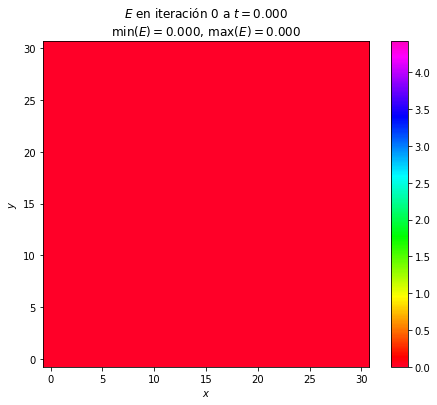

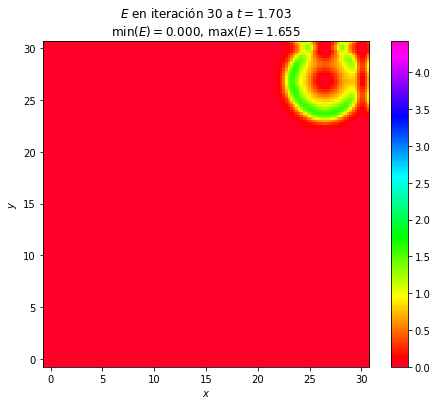

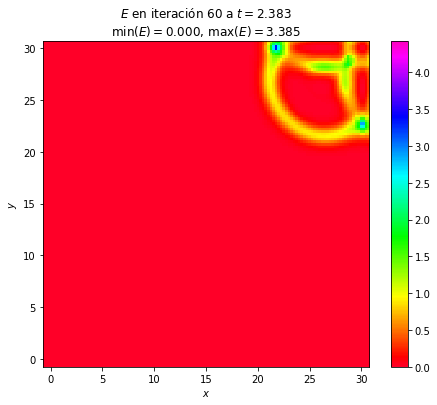

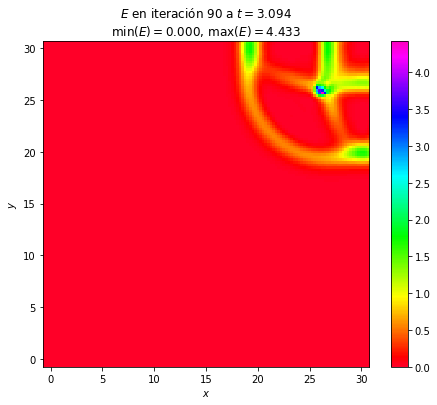

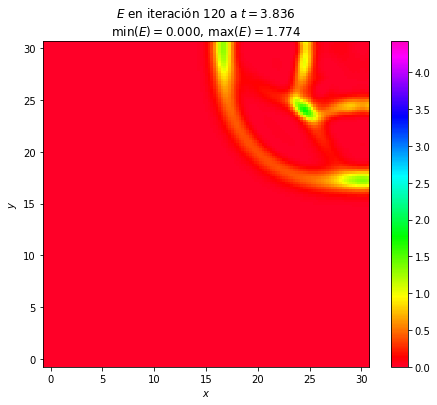

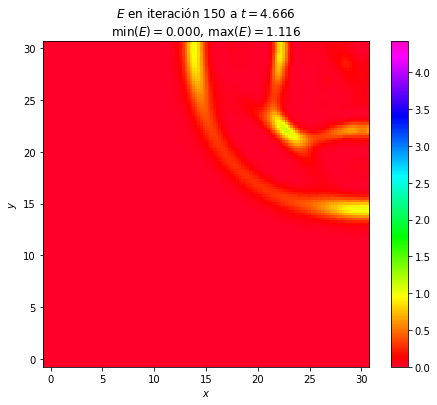

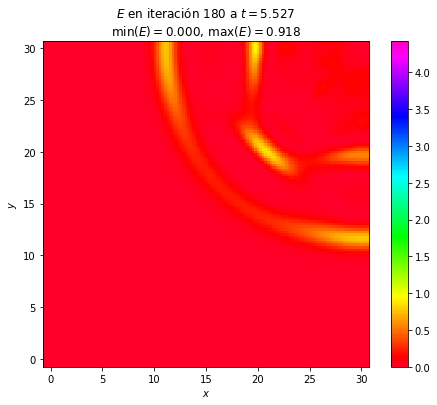

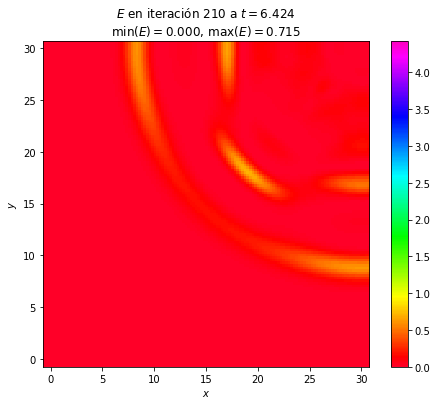

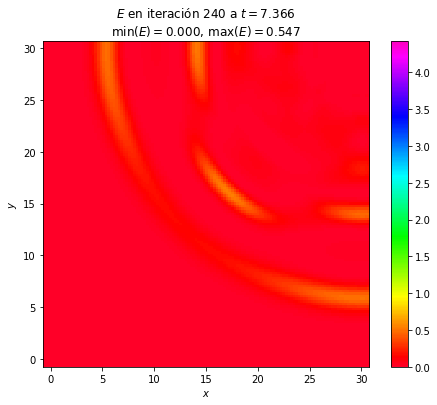

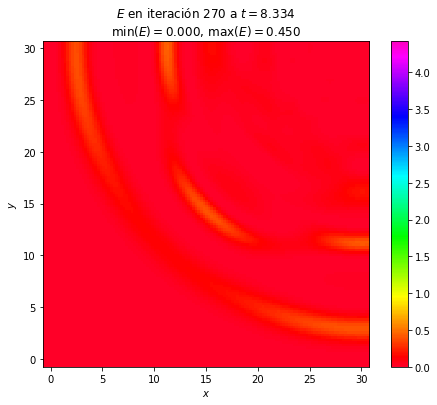

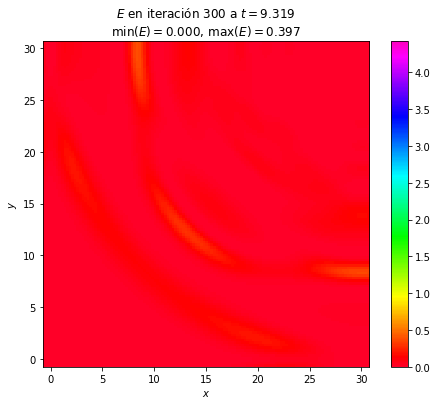

In [45]:
# Calcula máximo y mínimo global.
energy_min, energy_max = np.min(file_data[:, 12]), np.max(file_data[:, 12])
# Vamos a graficar para cada iteración única.
for i in iters:
    # Extrae información correspondiendte a la iteración actual.
    grid = file_data[file_data[:,0] == i, :]
    # Mallas x, y.
    x = grid[:,9]
    x_min, x_max = np.min(x), np.max(x)
    y = grid[:,10]
    y_min, y_max = np.min(y), np.max(y)
    # Valor de energy.
    energy = grid[:,12]
    # Hay que hacer de energy un arreglo bidimensional.
    # Necesitamos el número de elemntos únicos en x y y.
    energy_2d = energy.reshape(len(np.unique(y)), len(np.unique(x)))
    # Genera figura.
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(energy_2d[:,:], cmap, clim=(energy_min, energy_max), origin='lower', extent = [x_min, x_max, y_min, y_max])
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")
    ax.set_title(r"$E$ en iteración $%d$ a $t = %3.3f$" % (i, time_data[iters == i][0])  +  '\n' +  r"$\min(E) = %3.3f,\, \max(E) = %3.3f$" % (np.min(energy_2d), np.max(energy_2d)))
    plt.colorbar(im, ax = ax)
    plt.show()

## El archivo `param.ccl` y un ejercicio.

No vimos el archivo de parámetros a profundidad. El punto prinicpal de este archivo es dar parámetros que controlen la simulación y se puedan leer a partir de un archivo de parámetros. Un ejemplo completo está abajo.

In [58]:
%%writefile ~/CactusTutorial/CactusFW2/arrangements/Utils/EnergyCalc/param.ccl

## Hay cinco tipos de parámetros: int, real, keyword, string y boolean.
## Los siguientes comentarios dan prototipos para cada uno.
#
#CCTK_INT uno_a_cinco "Este parámetro entero va del 1 al 5"
#{
#    1:5 :: "Este es un comentario dentro de la declaración."
#} 3 # Este es el valor default.
#
#CCTK_REAL de_2p5_a_3p8e4 "Este parámetro real va de 2.5 a 3.8e4"
#{
#    2.5:3.8e4 :: "Un comentario dentro de la declaración."
#} 4.4e3 # El valor predeterminado.
#
#CCTK_KEYWORD orden_evol "Orden de evolución del código"
#{
#    "uno" :: "El código evoluciona a orden 1."
#    "dos" :: "El código evoluciona a orden 2."
#    "tres" :: "El código evoluciona a orden 3."
#    "cuatro" :: "El código evoluciona a orden 4."
#} "dos" # La evolución es a orden 2 por default.
#
#CCTK_STRING cadena_ejemplo "Un parámetro cadena."
#{
#    .* :: "Esta es una expresión regular para lo que pueda haber en esta cadena."#
#} "Bla, bla, bla, bla..." # Este es el valor predeterminado.
#
#BOOLEAN un_booleano "Un parámetro booleano."
#{
#} true # El valor base es verdadero.

Overwriting /home/santiago/CactusTutorial/CactusFW2/arrangements/Utils/EnergyCalc/param.ccl


* El ejercicio consiste en calcular el laplaciano en dos dimensiones de $\eta$ en un nuevo thorn. Es decir,

$$\nabla^2\,\eta = \frac{\partial^2\,\eta}{\partial x^2} + \frac{\partial^2\,\eta}{\partial y^2}\,.$$

    El laplaciano lo puedes calcular con diferencias finitas a segundo orden:

$$f''(x) = \frac{f(x-h) - 2f(x) + f(x+h)}{h^2}$$

* Pista: Para obtener $f(x)$ y $f(x+h)$ podrías hacer algo del estilo
```C
  int cc = CCTK_GFINDEX3D(cctkGH,i,j,k)
  int cp1 = CCTK_GFINDEX3D(cctkGH,i+1,j,k)
  CCTK_REAL fx = f[cc]; // Esto es f[x]
  CCTK_REAL fx1 = f[cp1]; // Esto es f[x+dx]
```
* Para obtener $dx$ y $dy$ puedes utilizar `cctk_delta_space[0]` y `cctk_delta_space[1]` para este caso donde el paso es fijo. Para pasos variables como en un AMR tendrías que utilizar las GF's `dx` y `dy`.